# Assignment 3

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

C:\Users\anton\AppData\Local\Temp\ipykernel_11252\3898210913.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


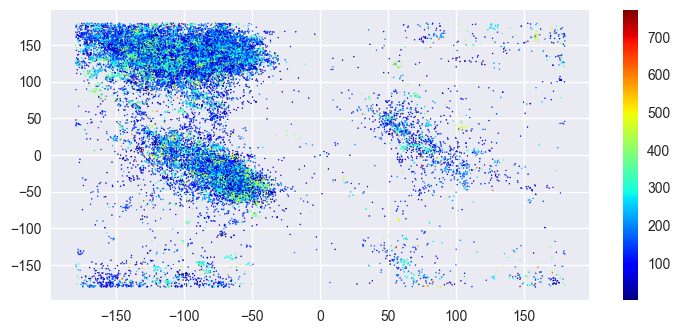

In [169]:
d = pd.read_csv('./data_assignment3.csv')

xValues = d['phi']
yValues = d['psi']

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.scatter(xValues,yValues,s=0.5, c=d['position'], cmap="jet")

plt.colorbar()

plt.show()

# KMeans

best fit i: (3, 0.6724895253169637)


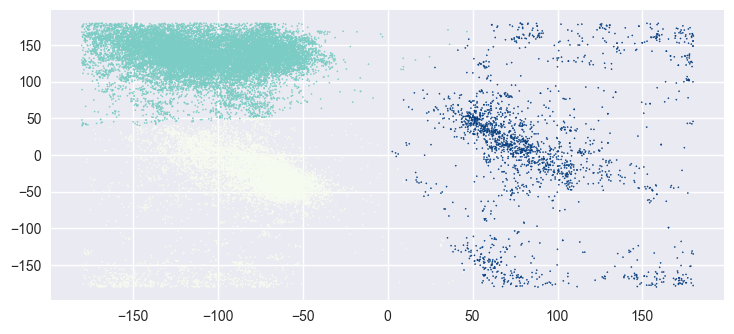

In [178]:
xy_vals = list(zip(xValues, yValues))
X = np.array(xy_vals)

score = -1
best_fit = (0, 0, 0)
for n_clusters in range(2, 5):
    kmeans = KMeans(n_clusters, n_init=10).fit_predict(X)
    new_score = silhouette_score(X, kmeans)
    if new_score > score:
        score = new_score
        best_fit = (n_clusters, score)
        d['color_kmeans'] = kmeans
 
plt.scatter(d['phi'], d['psi'], c=d['color_kmeans'], s=0.7,cmap='GnBu')

print(f'best fit is: {best_fit}')

# output = []
# k_values = range(1,40)
# for k in k_values:
#     labels = KMeans(n_clusters=k).fit(stdDf).labels_
#     score = silhouette_score(stdDf, labels)
#     output.append((k, score))

# plt.show()

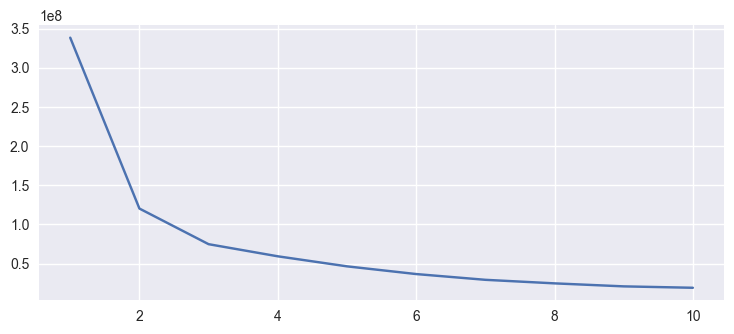

In [174]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    clustering.fit(X)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss)
plt.show()

**3) DBSCAN**

1


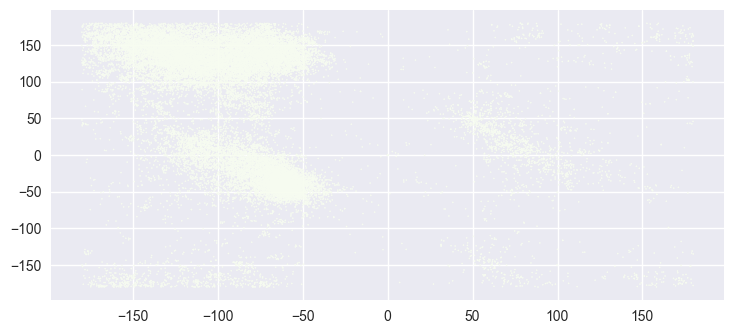

In [164]:
# computing the DBSCAN
labels = DBSCAN(eps=50, min_samples=100).fit_predict(X)
zipped = zip(xy_vals, labels)

print(len(set(labels)))

d['color_dbscan'] = labels

plt.scatter(d['phi'], d['psi'], c=d['color_dbscan'], s=0.7,cmap='GnBu')



# for coordinates, label in list(zipped)[::30]:
#     plt.scatter(coordinates[0], coordinates[1], s=3, c=colors[label])



In [165]:
# counting the number of clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1) 

print('Estimated number of clusters: %d' % n_clusters_) 
print('Estimated number of noise points: %d' % n_noise_) 


Estimated number of clusters: 1
Estimated number of noise points: 0


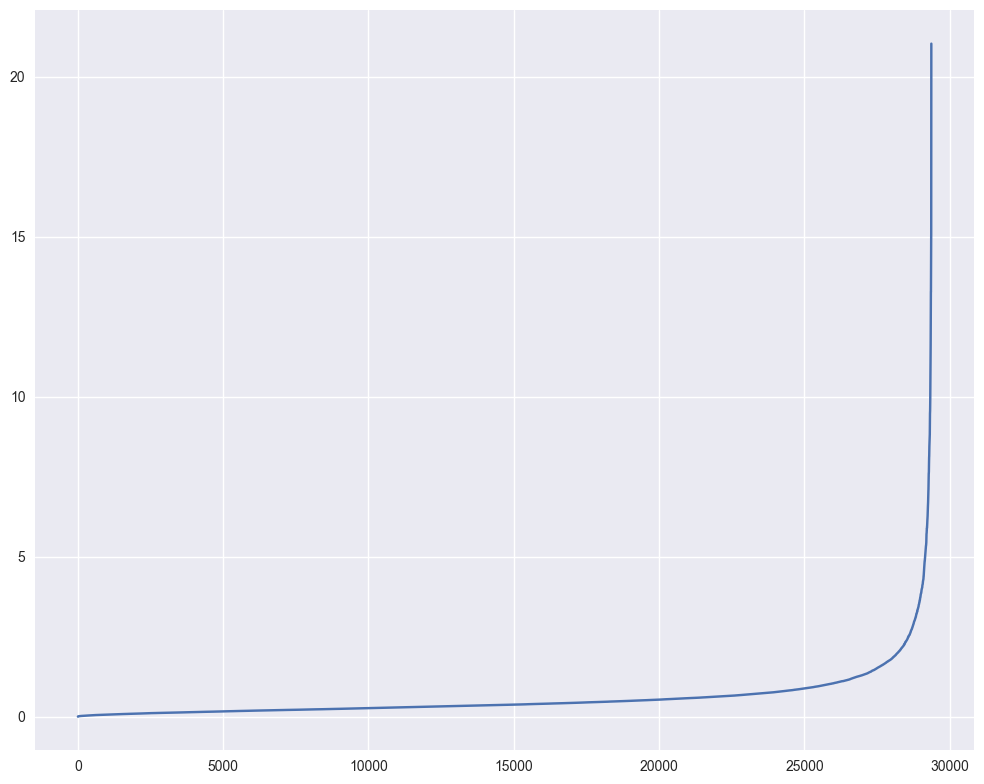

In [166]:
nn = NearestNeighbors(n_neighbors=20).fit(X)
distances, indices = nn.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)